## Problem Statement: 

You work in XYZ Company as a Python Data Scientist. The company officials
have collected some data on salaries based on year of experience and wish for
you to create a model from it.

## Dataset:

data.csv

## Tasks To Be Performed:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Load the dataset using pandas

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


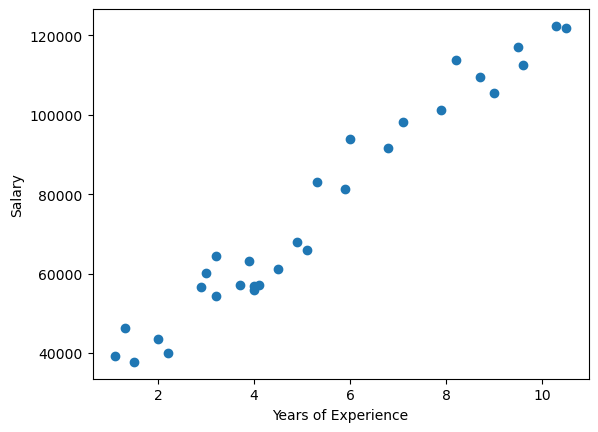

In [5]:
plt.scatter( data['YearsExperience'], data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary');

#### 2. Extract data from years experience column is a variable named X

In [6]:
X = data['YearsExperience'].values

#### 3. Extract data from the salary column is a variable named Y

In [7]:
Y = data['Salary'].values

#### 4. Divide the dataset into two parts for training and testing in 66% and 33% proportion

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3333, random_state = 1)

#### 5. Create and train Linear Regression Model on training set

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
regression = LinearRegression()

In [12]:
regression.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

LinearRegression()

In [13]:
regression.intercept_

array([26137.2400142])

In [14]:
regression.coef_

array([[9158.13919873]])

#### 6. Make predictions based on the testing set using the trained model

In [15]:
Y_predict = regression.predict(X_test.reshape(-1, 1))

#### 7. Check the performance by calculating the r2 score of the model

In [16]:
from sklearn import metrics

In [17]:
metrics.mean_squared_error(Y_test, Y_predict.reshape(10)) #mean square error of test actual vs prediction

37496296.6187984

In [18]:
metrics.r2_score(Y_train.reshape(-1, 1), regression.predict(X_train.reshape(-1, 1))) #R2 based on train data

0.9589827355323256

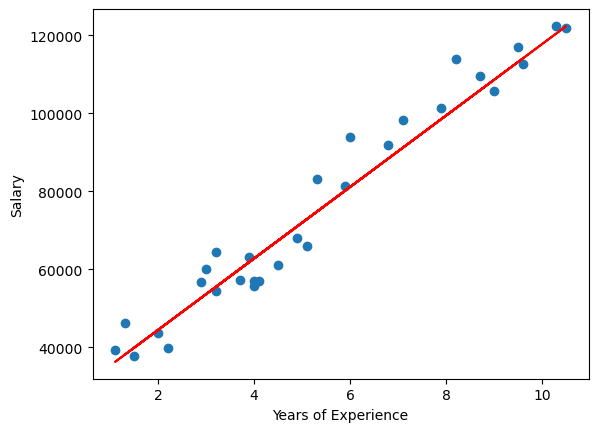

In [19]:
plt.scatter( data['YearsExperience'], data['Salary'])
plt.plot(X_train, regression.predict(X_train.reshape(-1, 1)), color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary');

## Assumption checks

#### Residual checks

In [20]:
residuals = Y_train.reshape(-1, 1) - regression.predict(X_train.reshape(-1, 1))

In [21]:
residuals.shape = (20,)

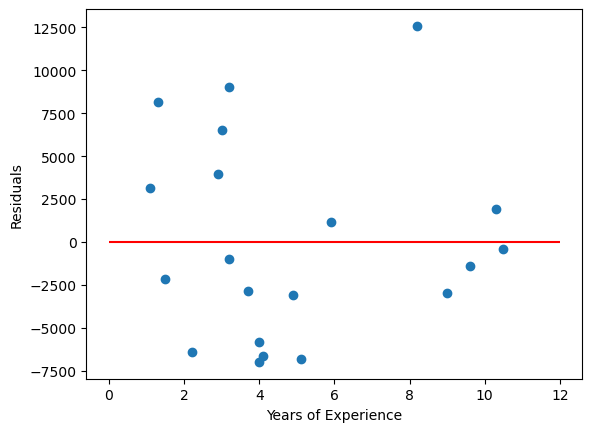

In [22]:
plt.scatter(X_train, residuals)
plt.hlines(y =0, xmin = 0, xmax = 12, colors='red')
plt.xlabel('Years of Experience')
plt.ylabel('Residuals');

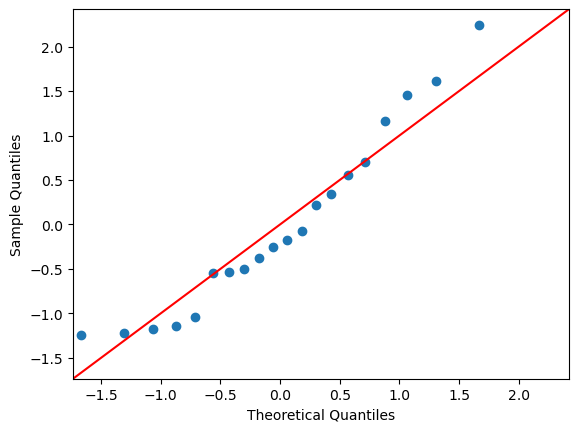

In [23]:
import statsmodels.api as sm    
  
sm.qqplot((residuals - np.mean(residuals))/(np.std(residuals)), line ='45');